In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import anndata
import mudata as md
from mudata import MuData
import muon as mu
import time
from sklearn.metrics.cluster import adjusted_rand_score
import TriTan
from memory_profiler import memory_usage
import tracemalloc

/mnt/iusers01/fatpou01/bmh01/t48955xm/.conda/envs/maxxxxxxxin/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
tritan = TriTan.TriTan(res_size=120)

In [2]:
mdata = md.read("./GSE194122/GSE194122.h5mu")

In [3]:
mdata

MuData object with n_obs × n_vars = 69249 × 119350
  obs:	'cell_type', 'TriTan', 'MOFA', 'M0JITOO', 'Seurat4 WNN'
  var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  obsm:	'ATAC_umap', 'GEX_umap', 'X_umap'
  2 modalities
    rna:	69249 x 11639
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'log1p'
    atac:	69249 x 107711
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'log1p'

In [15]:
import random
index = random.sample(range(69249),3000)

In [77]:
pd.DataFrame(index_60k).to_csv('60kindex.txt',sep='\t',header=None,index=None)

In [26]:
index_10k = random.sample(range(69249),10000)
index_20k = random.sample(range(69249),20000)
index_30k = random.sample(range(69249),30000)
index_45k = random.sample(range(69249),45000)
index_60k = random.sample(range(69249),60000)

NameError: name 'random' is not defined

In [27]:
index_10k =pd.read_csv("10kindex.txt",header=None,sep='\t')
index_20k =pd.read_csv("20kindex.txt",header=None,sep='\t')
index_30k =pd.read_csv("30kindex.txt",header=None,sep='\t')
index_45k =pd.read_csv("45kindex.txt",header=None,sep='\t')
index_60k =pd.read_csv("60kindex.txt",header=None,sep='\t')
index_3k =pd.read_csv("3kindex.txt",header=None,sep='\t')

In [28]:
index_3k = index_3k[[0]].T.values[0]
index_10k = index_10k[[0]].T.values[0]
index_20k = index_20k[[0]].T.values[0]
index_30k = index_30k[[0]].T.values[0]
index_45k = index_45k[[0]].T.values[0]
index_60k = index_60k[[0]].T.values[0]

In [116]:
m1 = mdata[index_30k,:]

## 3k

In [48]:
%%time
mu.tl.mofa(m1)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=3000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=3000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights

In [109]:
tracemalloc.start()
mu.tl.mofa(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=3000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=3000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights

In [42]:
%%time
tritan.fit(m1)

CPU times: user 9min 33s, sys: 5min 6s, total: 14min 39s
Wall time: 2min 2s


In [98]:
tracemalloc.start()
tritan.fit(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()

4.035708690062165


## 10k

In [81]:
%%time
mu.tl.mofa(m1)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=10000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=10000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [111]:
tracemalloc.start()
mu.tl.mofa(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=10000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=10000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [44]:
%%time
tritan.fit(m1)

CPU times: user 23min 26s, sys: 9min 3s, total: 32min 30s
Wall time: 5min 4s


In [72]:
tracemalloc.start()
tritan.fit(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()

13.11129246931523


## 20k

In [83]:
%%time
mu.tl.mofa(m1)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=20000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=20000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [113]:
tracemalloc.start()
mu.tl.mofa(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=20000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=20000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [47]:
%%time
tritan.fit(m1)

CPU times: user 36min 25s, sys: 15min 12s, total: 51min 37s
Wall time: 8min 41s


In [74]:
tracemalloc.start()
tritan.fit(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()

26.06798506062478


## 30k

In [85]:
%%time
mu.tl.mofa(m1)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=30000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=30000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [117]:
tracemalloc.start()
mu.tl.mofa(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=30000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=30000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [49]:
%%time
tritan.fit(m1)

CPU times: user 54min 1s, sys: 22min 25s, total: 1h 16min 26s
Wall time: 12min 55s


In [100]:
tracemalloc.start()
tritan.fit(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()

39.07294953428209


## 45k

In [12]:
%%time
mu.tl.mofa(m1)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=45000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=45000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [118]:
m1 = mdata[index_45k,:]

In [119]:
tracemalloc.start()
mu.tl.mofa(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=45000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=45000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [53]:
%%time
tritan.fit(m1)

CPU times: user 1h 22min 12s, sys: 36min 38s, total: 1h 58min 51s
Wall time: 19min 34s


In [103]:
tracemalloc.start()
tritan.fit(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1]
print(peak_memory/1024/1024/1024)
tracemalloc.stop()

58.472081914544106


## 60k

In [22]:
%%time
mu.tl.mofa(m1)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=60000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=60000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [120]:
m1 = mdata[index_60k,:]

In [121]:
tracemalloc.start()
mu.tl.mofa(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1] 
print(peak_memory/1024/1024/1024)
tracemalloc.stop()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=60000 samples and D=11639 features...
Loaded view='atac' group='group1' with N=60000 samples and D=107711 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weigh

In [55]:
%%time
tritan.fit(m1)

CPU times: user 1h 45min 40s, sys: 39min 31s, total: 2h 25min 11s
Wall time: 24min 59s


In [107]:
tracemalloc.start()
tritan.fit(m1)
snapshot = tracemalloc.take_snapshot()
peak_memory = tracemalloc.get_traced_memory()[1]
print(peak_memory/1024/1024/1024)
tracemalloc.stop()

77.89204084221274


In [10]:
plt.rcParams["figure.figsize"] = (4,4)

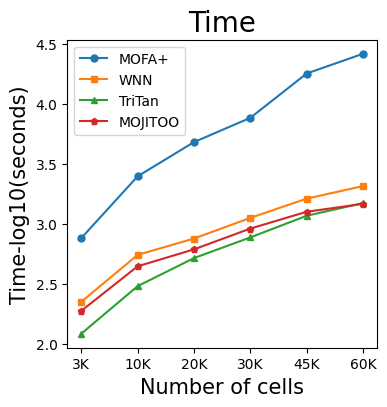

In [18]:
import matplotlib.pyplot as plt

x = ['3K','10K','20K','30K','45K','60K']
y1 = [2.8830933585756897,
 3.398287305357401,
 3.683587317572767,
 3.8860392755664424,
 4.255537826224604,
 4.4204838464200416]
y3 = [2.0863598306747484,
 2.482873583608754,
 2.7168377232995247,
 2.88930170250631,
 3.0696680969115957,
 3.1758016328482794]
y2 = [2.3521825181113627,
 2.74350976472843,
 2.8796692056320534,
 3.0519239160461065,
 3.2127201544178425,
 3.3170181010481117]
y4 = [2.2764618041732443,
 2.6483600109809315,
 2.7895807121644256,
 2.9628426812012423,
 3.1031192535457137,
 3.1687920203141817]
plt.title('Time',fontsize=20)  # 折线图标题
plt.xlabel('Number of cells',fontsize=15)  # x轴标题
plt.ylabel('Time-log10(seconds)',fontsize=15)  # y轴标题
plt.plot(x, y1, marker='o', markersize=5)  # 绘制折线图，添加数据点，设置点的大小
plt.plot(x, y2, marker='s', markersize=5)
plt.plot(x, y3, marker= '^', markersize=5)
plt.plot(x, y4, marker='p', markersize=5)



plt.legend(['MOFA+', 'WNN', 'TriTan', 'MOJITOO'])  # 设置折线名称

plt.savefig("./GSE194122/TIME.png", dpi=750, bbox_inches = 'tight')

In [12]:
from matplotlib.pyplot import MultipleLocator

In [2]:
import matplotlib as mpl
mpl.rcParams['font.serif'] = ['Times New Roman']

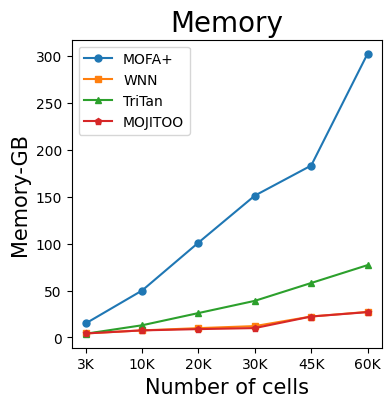

In [20]:
x = ['3K','10K','20K','30K','45K','60K']
y1 = [15,50,101,151,183,302]
y3 = [4,13,26,39,58,77]
y2 = [4.3017578125,
 7.55078125,
 9.9365234375,
 12.1259765625,
 22.322265625,
 27.2451171875]
y4 = [4.3017578125,
 7.55078125,
 8.9,
 10,
 22.322265625,
 27]
plt.title('Memory',fontsize=20)  # 折线图标题
plt.xlabel('Number of cells',fontsize=15)  # x轴标题
plt.ylabel('Memory-GB',fontsize=15)  # y轴标题


plt.plot(x, y1, marker='o', markersize=5)  # 绘制折线图，添加数据点，设置点的大小
plt.plot(x, y2, marker='s', markersize=5)
plt.plot(x, y3, marker= '^', markersize=5)
plt.plot(x, y4, marker='p', markersize=5)


plt.legend(['MOFA+', 'WNN','TriTan',  'MOJITOO'])  # 设置折线名称
plt.savefig('./GSE194122/MEMORY.png', dpi=750, bbox_inches = 'tight')

